# VGG

In [38]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

data_dir = f"{os.getcwd()}/Celebrity Faces Dataset"
img_width, img_height = 224, 224
batch_size = 32

# Data preprocessing
# Link where I figured out how to conduct a train-test split for each celebrity's folder contining their facial images
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

train_generator = datagen.flow_from_directory(
    data_dir, # train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

test_generator = datagen.flow_from_directory(
    data_dir, # test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([base_model,
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(17, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 1350 images belonging to 17 classes.
Found 450 images belonging to 17 classes.


In [39]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/5
42/42 [==============================] - 174s 4s/step - loss: 3.7644 - accuracy: 0.1593 - val_loss: 2.1184 - val_accuracy: 0.3326
Epoch 2/5
42/42 [==============================] - 187s 4s/step - loss: 1.3871 - accuracy: 0.6146 - val_loss: 1.5085 - val_accuracy: 0.5089
Epoch 3/5
42/42 [==============================] - 167s 4s/step - loss: 0.6484 - accuracy: 0.8847 - val_loss: 1.2777 - val_accuracy: 0.5804
Epoch 4/5
42/42 [==============================] - 179s 4s/step - loss: 0.3147 - accuracy: 0.9643 - val_loss: 1.1600 - val_accuracy: 0.6138
Epoch 5/5
42/42 [==============================] - 193s 5s/step - loss: 0.1691 - accuracy: 0.9939 - val_loss: 1.0060 - val_accuracy: 0.6853


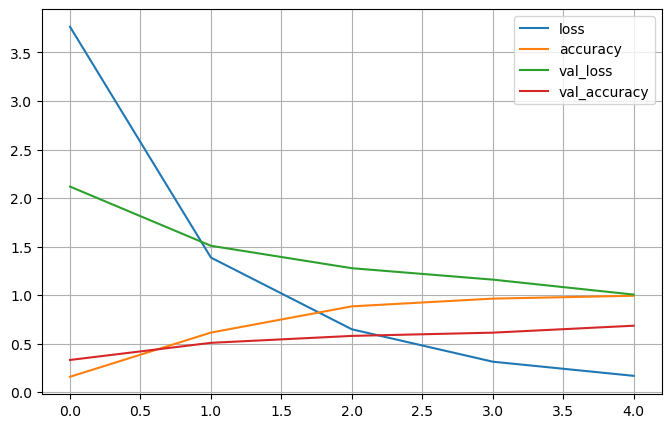

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

#### Example where "test_generator" is NOT included in "model.fit" but in "model.evaluate" instead.

In [3]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5)

Epoch 1/5
42/42 [==============================] - 128s 3s/step - loss: 3.5389 - accuracy: 0.1608
Epoch 2/5
42/42 [==============================] - 125s 3s/step - loss: 1.7197 - accuracy: 0.4742
Epoch 3/5
42/42 [==============================] - 129s 3s/step - loss: 1.0009 - accuracy: 0.7716
Epoch 4/5
42/42 [==============================] - 130s 3s/step - loss: 0.5701 - accuracy: 0.9112
Epoch 5/5
42/42 [==============================] - 129s 3s/step - loss: 0.3057 - accuracy: 0.9734


In [4]:
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 44s 3s/step - loss: 1.2100 - accuracy: 0.6044
Test Loss: 1.2100220918655396
Test Accuracy: 0.6044444441795349


# Flat Augmentation with Some Combination Augmentation

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential([(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3))),
                     MaxPooling2D((2, 2)),
                     Conv2D(64, (3, 3), activation='relu'),
                     MaxPooling2D((2, 2)),
                     Conv2D(128, (3, 3), activation='relu'),
                     MaxPooling2D((2, 2)),
                     Flatten(),
                     Dense(512, activation='relu'),
                     Dense(17, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/10
42/42 [==============================] - 28s 662ms/step - loss: 3.6641 - accuracy: 0.0903 - val_loss: 2.7590 - val_accuracy: 0.1272
Epoch 2/10
42/42 [==============================] - 28s 658ms/step - loss: 2.6153 - accuracy: 0.1616 - val_loss: 2.4123 - val_accuracy: 0.2143
Epoch 3/10
42/42 [==============================] - 30s 701ms/step - loss: 2.0373 - accuracy: 0.3604 - val_loss: 2.2601 - val_accuracy: 0.2857
Epoch 4/10
42/42 [==============================] - 27s 632ms/step - loss: 1.1711 - accuracy: 0.6335 - val_loss: 2.8280 - val_accuracy: 0.2879
Epoch 5/10
42/42 [==============================] - 28s 665ms/step - loss: 0.4236 - accuracy: 0.8718 - val_loss: 3.6315 - val_accuracy: 0.2991
Epoch 6/10
42/42 [==============================] - 34s 820ms/step - loss: 0.1753 - accuracy: 0.9545 - val_loss: 4.5713 - val_accuracy: 0.3192
Epoch 7/10
42/42 [==============================] - 26s 611ms/step - loss: 0.0644 - accuracy: 0.9818 - val_loss: 4.9947 - val_accuracy: 0.3214

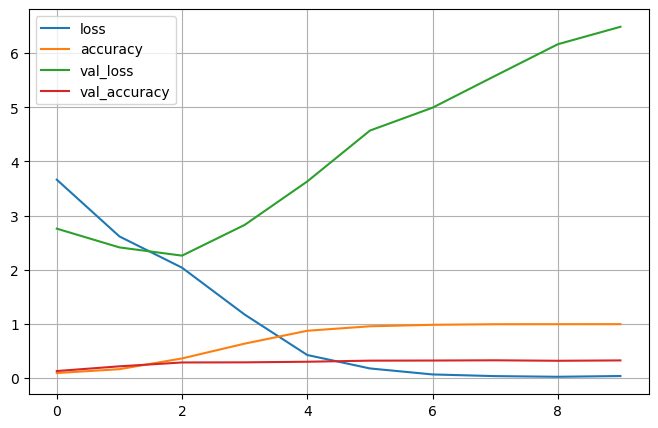

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()